<a href="https://colab.research.google.com/github/Rok-sana/ML-course/blob/main/Homework_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.util import minibatch, compounding
import random

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**EDA**

<AxesSubplot:>

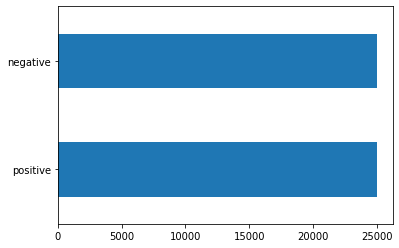

In [ ]:
df['sentiment'].value_counts().plot(kind='barh')

The positive and negative class are distributed equivalently

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
punct = string.punctuation

In [ ]:
stopwords = list(STOP_WORDS)

**Preprocessing Data**

In [ ]:
def text_data_cleaning(sentence):
    doc = nlp(sentence) 
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-": #personal name
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [ ]:
X = df['review']
y = df['sentiment']

**Split on Train and Test data** 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = LinearSVC()

**Added Pipeline with TfidfVectorizer and LinearSVC**

In [ ]:
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7f0f87c32940>)),
                ('clf', LinearSVC())])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.90      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
confusion_matrix(y_test, y_pred)


array([[4382,  579],
       [ 484, 4555]])